In [64]:
print('hehe')

hehe


In [65]:
'''import random
import numpy as np
import time
import math 

def create_route(customer_nodes):
    route = customer_nodes[:]
    random.shuffle(route)
    return route

def get_n_neighbours(x, n, lower_bound, upper_bound):
    neighbors = set()
    while len(neighbors) < n:
        i, j = random.sample(range(len(x)), 2)
        neighbor = x.copy()
        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
        neighbors.add(tuple(neighbor)) 
    return [list(neighbor) for neighbor in neighbors]

def create_multiple_routes(customer_nodes, n):
    routes = []
    unique_routes = set()
    
    while len(routes) < n:
        new_route = create_route(customer_nodes)
        route_tuple = tuple(new_route)
        
        if route_tuple not in unique_routes:
            unique_routes.add(route_tuple)
            routes.append(new_route)
    
    return routes

def generate_cost_matrix(num_nodes, num_customers, seed=None):
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)

    grid_rows = num_customers#int(np.sqrt(num_nodes))
    grid_cols = grid_rows
    grid = np.arange(num_customers**2).reshape(grid_rows, grid_cols)

    node_list = list(range(1, num_nodes))  # Exclude 0 as it's the depot

    def gen_node_list(node_list, num_customers):
        return random.sample(node_list, min(num_customers, len(node_list)))

    customer_node_list = gen_node_list(node_list, num_customers)

    def distcalc(customer_node_list):
        nodecoords = []
        nodecoords.append([0, 0])  # Starting point (depot)
        for node in customer_node_list:
            a, b = np.where(grid == node)
            nodecoords.append([a[0], b[0]])

        distmat = np.zeros((len(nodecoords), len(nodecoords)))
        for i in range(len(nodecoords)):
            for j in range(len(nodecoords)):
                distmat[i, j] = abs(nodecoords[i][0] - nodecoords[j][0]) * 5 + abs(nodecoords[i][1] - nodecoords[j][1]) * 5

        return distmat, customer_node_list

    cost_matrix, customer_node_list = distcalc(customer_node_list)

    return cost_matrix, customer_node_list

# Generate the cost matrix and customer node list with a specific seed
Cost_matrix, Customer_nodes = generate_cost_matrix(60, 10, seed=1234)
print("Customer Nodes:", Customer_nodes)
print("Cost Matrix:")
print(Cost_matrix)

def SAR(k):
    n0=8
    return math.ceil(n0*(np.log(k)**2))
k = 2
def stoichastic_cost_helper(route, cost_matrix=Cost_matrix, customer_nodes=Customer_nodes, percentage=10, seed=None):
    if seed is not None:
        np.random.seed(seed)

    total_cost = 0.0
    n = len(route)
    total_cost += cost_matrix[0][customer_nodes.index(route[0])] # depot to first customer
    for i in range(n):
        current_city = route[i]
        next_city = route[(i + 1) % n]

        current_index = customer_nodes.index(current_city)
        next_index = customer_nodes.index(next_city)

        original_cost = cost_matrix[current_index + 1][next_index + 1]  # +1 because 0 is depot

        error_range = original_cost * (percentage / 100)
        new_cost = np.random.uniform(original_cost - error_range, original_cost + error_range)
        
        total_cost += new_cost

    return total_cost

def stochastic_cost_function(route,n, cost_matrix=Cost_matrix, customer_nodes=Customer_nodes, percentage=10, seed=42):
    global gas , k
    n = 7#SAR(k)
    gas += n#SAR(n)
    #print(gas)
    return np.mean([stoichastic_cost_helper(route, cost_matrix, customer_nodes, seed=seed) for _ in range(n)])

# Initialize gas variable
gas = 0

# Create an initial solution (route)
initial_sol = Customer_nodes  # Use the generated customer nodes
print("Initial Route:", initial_sol)

# Calculate the stochastic cost
stochastic_cost_value = stochastic_cost_function(initial_sol,n=SAR(k), cost_matrix=Cost_matrix, customer_nodes=Customer_nodes, seed=42)
print("Stochastic Cost:", stochastic_cost_value)
print("Gas used:", gas)'''

'import random\nimport numpy as np\nimport time\nimport math \n\ndef create_route(customer_nodes):\n    route = customer_nodes[:]\n    random.shuffle(route)\n    return route\n\ndef get_n_neighbours(x, n, lower_bound, upper_bound):\n    neighbors = set()\n    while len(neighbors) < n:\n        i, j = random.sample(range(len(x)), 2)\n        neighbor = x.copy()\n        neighbor[i], neighbor[j] = neighbor[j], neighbor[i]\n        neighbors.add(tuple(neighbor)) \n    return [list(neighbor) for neighbor in neighbors]\n\ndef create_multiple_routes(customer_nodes, n):\n    routes = []\n    unique_routes = set()\n    \n    while len(routes) < n:\n        new_route = create_route(customer_nodes)\n        route_tuple = tuple(new_route)\n        \n        if route_tuple not in unique_routes:\n            unique_routes.add(route_tuple)\n            routes.append(new_route)\n    \n    return routes\n\ndef generate_cost_matrix(num_nodes, num_customers, seed=None):\n    if seed is not None:\n      

USER DEFINED VARIABLES

In [66]:
low_bound = 0
up_bound = 100
no_of_clusters =4
solution_dimension = 2
total_budget = 5e3
alpha = 0.3
no_of_neighbours = 20

In [67]:
import heapq
import numpy as np
import math
def stochastic_cost_function_helper(x:list[int]): #here x holds [x1,x2,x3,.....]
    y=0
    noise = np.random.normal(0, 0.3)
    for i in x:
        y += ((np.sin(0.05*np.pi*i)**6)/(2**((2*(((i-10)/80)**2)))) + noise)
    return -y 
#stochastic_cost_function(0)   
def stochastic_cost_function(x:list[int],n:int = 10):
    global gas
    gas += n
    return np.mean([stochastic_cost_function_helper(x) for _ in range(n)])
low_bound = 0
up_bound = 100

def get_n_neighbours(x: list[int], n: int = no_of_neighbours, lower_bound: int = low_bound, upper_bound: int = up_bound):
    neighbors = []
    for i in range(n):
        reach = 5 * np.random.randn(1, len(x))  # normal distribution with 0 mean and 5 std
        new_neighbor = np.clip(np.array(x) + reach[0], lower_bound, upper_bound)
        neighbors.append(list(new_neighbor))
    return neighbors
k = 2
def SAR(k):
    
    n0=8
    return math.ceil(n0*(np.log(k)**2))
get_n_neighbours([10,10],8)

[[6.278896509537775, 11.954529993257566],
 [10.96866390298105, 5.597363198001916],
 [11.709465053388216, 9.289063786893998],
 [13.562712228130081, 11.219501081503804],
 [9.875420868080036, 7.053254243921646],
 [22.232761088563638, 15.206641978689689],
 [14.689666952912233, 12.802974113924435],
 [5.79683517225177, 7.553009622468189]]

In [68]:
total_budget = 1e4
GA_budget = 0
compass_budget = 0
def assign_budgets(total_budget,alpha =alpha):
    global GA_budget , compass_budget
    #alpha = 0.5
    GA_budget = total_budget*alpha
    compass_budget = total_budget*(1-alpha)
assign_budgets(total_budget)

In [69]:
import numpy as np
from typing import List, Dict, Tuple
import heapq
#global gas 
gas = 0
def create_genome(n,lower_bound =low_bound,upper_bound=up_bound):
    return [np.random.randint(lower_bound,upper_bound) for _ in range(n)]
print(create_genome(4))

'''def stochastic_cost_function_helper(x:list[int]): #here x holds [x1,x2,x3,.....]
    x = np.array(x)
    
    # Extract individual elements
    x1, x2, x3, x4 = x
    
    # Compute the deterministic part of the expression
    result = (x1 + 10 * x2)**2 + 5 * (x3 - x4)**2 + (x2 - 2 * x3)**4 + 10 * (x1 - x4)**4 + 1
    
    noise = np.random.normal(0, np.sqrt(result))
    
    result_with_noise = result + noise
    
    return result_with_noise'''
#print(stochastic_cost_function_helper([0,0,0,0]))
#stochastic_cost_function(0)   
'''def stochastic_cost_function(x:list[int],n:int=10):
    global gas
    gas += n
    return np.mean([stochastic_cost_function_helper(x) for _ in range(n)])'''

def euclidean_distance(centre_1 : List[int],centre_2: List[int]):
    array1 = np.array(centre_1)
    array2 = np.array(centre_2)

    # Calculate Euclidean distance
    euclidean_distance = np.linalg.norm(array1 - array2)
    return euclidean_distance

def find_farthest_point(center: List[int], sol_space: List[List[int]]) -> Tuple[List[int], float]: #Finds the farthest point in the solution space from the centre
    max_distance = 0
    farthest_point = None
    
    for point in sol_space:
        # Calculate the squared distance
        squared_distance = sum((c - p)**2 for c, p in zip(center, point))
        
        if squared_distance > max_distance:
            max_distance = squared_distance
            farthest_point = point
    
    # Calculate the actual distance (square root of the squared distance)
    max_distance = np.sqrt(max_distance)
    
    return farthest_point, max_distance

def closeset_centre(centers:List[List[int]],visited_solution:List[int]) -> List[int]:#Finds the closests centre to the point
    closest = [float('inf') for _ in centers]
    min_dist= float('inf')
    for center in centers:
        dist =euclidean_distance(center,visited_solution)
        if dist < min_dist:
            min_dist = dist
            closest = center
        #print('hehe: ',closest)
    return closest
#INITIALIZATION STEP
def initialize(mg:int,q:int = no_of_clusters,n:int = solution_dimension) : #n is dimension of solution vector and mg is number of solns sampled
    #n=4
    global gas,k
    unique_set = {}
    while len(unique_set) <mg: # Sampling Mg Solutions from the feasible set
        genome = create_genome(n)
        if tuple(genome) in unique_set:
            unique_set[tuple(genome)] = min(unique_set[tuple(genome)],stochastic_cost_function(genome))
        else:
            unique_set[tuple(genome)] = stochastic_cost_function(genome)
    
    heap = [(value,key) for key,value in unique_set.items()]
    heapq.heapify(heap)
    sorted_items = sorted(unique_set.items(), key=lambda x: x[1])
    #Selecting q best solutions as nice centres 
    niche_centers = sorted_items[:q]
    sol_space = sorted_items[q:]
    centers = [center[0] for center in niche_centers]
    clusters ={center:[] for center in centers}
    for sol in sol_space:
        clusters[tuple(closeset_centre(centers,sol[0]))].append(sol[0])
    best_center =  centers[0]
    sol_space = clusters[best_center]
    #print('Cluster: ',clusters)
    farthest_point , min_radius = find_farthest_point(best_center,centers[1:])
    
    for center in centers[1:]:
        if euclidean_distance(center,best_center) < 0.5*min_radius:
            clusters[tuple(best_center)].append(center)
            #print('cluster', clusters)
            if len(clusters[center])  > 0:
                clusters[tuple(best_center)].append(clusters.pop(center)[0])
    centers_remaining = [list(key) for key in clusters.keys()][1:]
    r = float('inf')
    for center in centers_remaining:
        r = min(euclidean_distance(center,best_center),r)
    r = r//2
    q = len(clusters.keys())
    sol_vals_dict = {} # maps each solution to closest center

   # print('clus: ',clusters)
    for key, list_of_lists in clusters.items():
       # print('lol: ',list_of_lists)
        for lst in list_of_lists:
           # print('lst: ',lst)
            sol_vals_dict[tuple(lst)] = unique_set[tuple(lst)]

    center_vals ={}
    for center in clusters.keys():
        center_vals[center] = stochastic_cost_function(center)
    k +=1 
    #print('ini ; ', k)
    return clusters , q , r , sol_vals_dict , center_vals
    
    
#clusters,q,r,sol_vals_dict,center_vals = initialize(4,200,6)


[70, 89, 43, 47]


In [70]:
def select_random_pair_in_range(dictionary: Dict[Tuple[int], int], lower_bound: int = low_bound, upper_bound: int = up_bound):
    eligible_pairs = [(key, value) for key, value in dictionary.items() 
                      if lower_bound <= value <= upper_bound]
    #for key,value in dictionary.items():
        #print(value)
   # print('e[ :',eligible_pairs)
    if not eligible_pairs:
        return None  # No pairs found within the specified range
    
    return eligible_pairs[np.random.choice(len(eligible_pairs))][0]

def get_mate(genome: List[int], sol_val_dict: Dict[Tuple[int], int]):
    temp_dict = sol_val_dict.copy()  # Create a copy of the original dictionary
    cost_value = temp_dict[tuple(genome)]  # Get the cost value for the genome
    
    del temp_dict[tuple(genome)]  # Remove the genome from the dictionary
    
    beta = 0.1
    #print('sol_val: ',len(sol_val_dict))
    mate = select_random_pair_in_range(temp_dict, (1 - beta) * cost_value, (1 + beta) * cost_value)
    #print('mate: ',mate)
    counter= 0 
    while not mate or list(mate) == genome:
        if counter > 10:
            mate = genome
            break
        #print('alppha: ',alpha)
        #print('12312')
        #Increasing visible space for finding mate
        beta += 0.1
        mate = select_random_pair_in_range(temp_dict, (1 - beta) * cost_value, (1 + beta) * cost_value)
        counter +=1
    
    return list(mate)

def single_point_crossover(parent1, parent2):
    size = len(parent1)
    parent1 = tuple(parent1)
    parent2 = tuple(parent2)
    # Choose a random crossover point (excluding the first and last positions)
    crossover_point = np.random.randint(1, size )
    
    # Create the first child
    child1 = list(parent1[:crossover_point] + tuple([-1] * (size - crossover_point)))
    pointer1 = crossover_point
    for gene in parent2[crossover_point:] + parent2[:crossover_point]:
        if gene not in child1:
            child1[pointer1] = gene
            pointer1 += 1
            if pointer1 == size:
                pointer1 = 0
    
    # Create the second child
    child2 = list(parent2[:crossover_point] + tuple([-1] * (size - crossover_point)))
    pointer2 = crossover_point
    for gene in parent1[crossover_point:] + parent1[:crossover_point]:
        if gene not in child2:
            child2[pointer2] = gene
            pointer2 += 1
            if pointer2 == size:
                pointer2 = 0
    
    return child1, child2

def evolution(clusters,sol_vals_dict,center_vals_dict):
    global k
    centers = center_vals_dict.keys()
    centers = [list(center) for center in centers]
    center_vals = center_vals_dict.values()
    center_vals = [val for val in center_vals]
    while True:
        sorted_items = sorted(sol_vals_dict.items(), key=lambda x: x[1])
        #elite_genome = sorted_items[:5]
        other_genomes = sorted_items
        #elite_genomes = [temp[0] for temp in elite_genome]
        other_genomes = [list(genome[0]) for genome in other_genomes]    
            
        
        #print('pther_genomes: ',other_genomes)
        #print('centers',centers)
        m =len(other_genomes)
        sol_val_new ={}
        sol_space=[]
        unique_set= set()
        for _ in range(m):
            #print('glob: ',k)

            i =np.random.randint(0,m)
            parent1 = other_genomes[i]
            parent2 = get_mate(parent1,sol_vals_dict)
            #print('qeqw')
            child1,child2 = single_point_crossover(parent1,parent2)
            cost_1 = stochastic_cost_function(child1)
            cost_2 = stochastic_cost_function(child2)
            add_1_to_sol = True
            add_2_to_sol = True
            unique_set.add(tuple(child1))
            unique_set.add(tuple(child2))
            #print('center_vals: ',center_vals)
            for j in range(len(center_vals)):
                if center_vals[j] > cost_1:
                    add_1_to_sol = False
                    centers[j] = child1
                    center_vals[j] = cost_1
                if center_vals[j] > cost_2:
                    centers[j] = child2
                    center_vals[j] = cost_2
                    add_2_to_sol = False
            if add_1_to_sol:
                sol_val_new[tuple(child1)] = cost_1
                sol_space.append(child1)
            if add_2_to_sol:
                sol_val_new[tuple(child2)] = cost_2
                sol_space.append(child2)
        centers1 = [tuple(center) for center in centers]
       # print('center list:',centers1)
        clusters ={center:[] for center in centers1}
        for sol in sol_space:
            #print('fwew',type(sol[0]))
            #print('sol: ',sol)
            clusters[tuple(closeset_centre(centers1,sol))].append(sol)
        best_center =  centers1[0]
        sol_space = clusters[best_center]
        #print('Cluster: ',clusters)
        #print(centers)
        farthest_point , min_radius = find_farthest_point(best_center,centers[1:])
        #print('sol_val:',sol_val_new)
        for center in centers[1:]:
            #print('eheh: ',center)
            if euclidean_distance(center,best_center) < 0.5*min_radius:
                #print('center: ',best_center)
                
#                clusters[tuple(best_center)].append(center)
                if tuple(center) in clusters:
                    if len(clusters[tuple(center)]) >0:
                        if tuple(center) in clusters:
                            clusters[tuple(best_center)].append(clusters.pop(tuple(center))[0])
        #print('Clusters: ',clusters)
        k+=1
        sol_vals_dict = sol_val_new
        if len(centers) == 1:
            print("Only one center is present")
            #print('no of centers: ',len(clusters))
            break
        
        if gas > GA_budget:
            #print('no of centers: ',len(clusters))
            #print('budget over')
            #print('clusters:',clusters.keys())

            break
    return clusters
        
            
            
            

In [71]:
np.random.seed(1234)
#final_cluster_set=evolution(clusters,sol_vals_dict,center_vals)
#print(final_cluster_set)

In [72]:
'''centers_items =  final_cluster_set.keys()
centers = [list(i) for i in centers_items]
print(centers)
sol_items = final_cluster_set.values()
final_clusters =[]
#print(sol_items)
cost_vals=[]
for i,local_cluster in enumerate(sol_items):
    print(local_cluster)
    local_cluster=local_cluster[:2]
    local_cluster.append(centers[i])
    final_clusters.append(local_cluster)
    cost_vals.append(stochastic_cost_function(centers[i]))
    print('-'*20)
    print(final_clusters)
print(final_clusters)'''


"centers_items =  final_cluster_set.keys()\ncenters = [list(i) for i in centers_items]\nprint(centers)\nsol_items = final_cluster_set.values()\nfinal_clusters =[]\n#print(sol_items)\ncost_vals=[]\nfor i,local_cluster in enumerate(sol_items):\n    print(local_cluster)\n    local_cluster=local_cluster[:2]\n    local_cluster.append(centers[i])\n    final_clusters.append(local_cluster)\n    cost_vals.append(stochastic_cost_function(centers[i]))\n    print('-'*20)\n    print(final_clusters)\nprint(final_clusters)"

In [73]:
'''fitness_vals=[]
total_costs = np.sum(cost_vals)
for i in range(len(cost_vals)):
    fitness_vals.append(cost_vals[i]/total_costs)'''

'fitness_vals=[]\ntotal_costs = np.sum(cost_vals)\nfor i in range(len(cost_vals)):\n    fitness_vals.append(cost_vals[i]/total_costs)'

COMPASS PART

In [74]:
import heapq
from typing import Tuple, List
import numpy as np
import math
'''def stochastic_cost_function_helper(x:list[int]): #here x holds [x1,x2,x3,.....]
    x = np.array(x)
    
    # Extract individual elements
    x1, x2, x3, x4 = x
    
    # Compute the deterministic part of the expression
    result = (x1 + 10 * x2)**2 + 5 * (x3 - x4)**2 + (x2 - 2 * x3)**4 + 10 * (x1 - x4)**4 + 1
    
    noise = np.random.normal(0, np.sqrt(result))
    
    result_with_noise = result + noise
    
    return result_with_noise
print(stochastic_cost_function_helper([0,0,0,0]))
#stochastic_cost_function(0)   
def stochastic_cost_function(x:list[int],n:int):
    return np.mean([stochastic_cost_function_helper(x) for _ in range(n)])'''
        
'''def get_n_neighbours(x: List[int], n: int, lower_bound: int = 0, upper_bound: int = 100) -> List[List[int]]:
    neighbors = []
    for _ in range(n):
        mean = 0
        std = 1
        random_floats = mean + std * np.random.randn(len(x))
        reach = np.round(random_floats).astype(int)
        
        # Create a new neighbor and ensure all values are within bounds
        new_neighbor = []
        for i, val in enumerate(x):
            new_val = val + reach[i]
            new_val = max(lower_bound, min(new_val, upper_bound))  # Clamp value between lower and upper bounds
            new_neighbor.append(new_val)
        
        neighbors.append(new_neighbor)
    
    return neighbors'''


#get_n_neighbours([10,10],8)

from typing import List, Dict, Tuple
def euclidean_distance(list1: List[int], list2: List[int]) -> float:
    if len(list1) != len(list2):
        raise ValueError("Both lists must have the same length")
    
    sum_squared_diff = sum((a - b) ** 2 for a, b in zip(list1, list2))
    distance = math.sqrt(sum_squared_diff)
    return distance
from heapq import nsmallest

def find_closest_keys(x_star_k: List[int], V_k: Dict[Tuple[int, ...], float], n: int = 10) -> List[Tuple[int, ...]]:
    def euclidean_distance(a, b):
        return np.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))
    
    x_star_k_tuple = tuple(x_star_k)
    
    distances = [
        (key, euclidean_distance(x_star_k, key)) 
        for key in V_k.keys() 
        if key != x_star_k_tuple
    ]
    
    closest_keys = nsmallest(n, distances, key=lambda x: x[1])
    return [key for key, _ in closest_keys]

def get_most_promising_area(x_star_k:List[int],neighbours: List[List[int]], V_k: Dict[Tuple[int,...], float]):
    mp_area=[]
    closest_keys = find_closest_keys(x_star_k,V_k,10)
    if len(V_k.keys()) ==0:
        return neighbours
    for sol in neighbours:
        sol_distance = euclidean_distance(x_star_k, sol)
        
        # Check if sol is closer to x_star_k than the other closest keys
        is_closer = all(sol_distance < euclidean_distance(x_star_k, key) for key in closest_keys)
        
        if is_closer:
            mp_area.append(sol)
    
    return mp_area
import gurobipy as gp
from gurobipy import GRB
def check_redundancy(x_star_k : List[int], V_k:List[List[int]]):
    x_star_k = np.array(x_star_k)
    redundancy_status = []
    
    for x_i in V_k:
        x_i = np.array(x_i)
        model = gp.Model()
        model.setParam('OutputFlag', 0)
        #print('x_star: ',x_star_k)
        n = len(x_star_k)
        x = model.addMVar(shape=n, vtype=GRB.CONTINUOUS, name="x")
        
        midpoint_i = (x_star_k + x_i) / 2
        diff = x_star_k - x_i
        
        # Correct way to create the objective function
        objective = gp.LinExpr()
        for j in range(n):
            #print('j:,',j,diff)
            objective += diff[j] * (x[j] - midpoint_i[j])
        model.setObjective(objective, GRB.MINIMIZE)
        
        for x_j in V_k:
            if not np.array_equal(np.array(x_j), x_i):
                x_j = np.array(x_j)
                midpoint_j = (x_star_k + x_j) / 2
                # Correct way to create the constraint
                constraint = gp.LinExpr()
                for j in range(n):
                    #print('j: ',j)
                    constraint += (x_star_k[j] - x_j[j]) * (x[j] - midpoint_j[j])
                model.addConstr(constraint >= 0)
        
        model.optimize()
        
        if model.status == GRB.OPTIMAL:
            obj_value = model.ObjVal
            redundancy_status.append(obj_value >= 0)
        else:
            redundancy_status.append(False)
    
    return redundancy_status
from multiprocessing import heap
from typing import List


def find_closest_keys(x_star_k: List[int], V_k: List[List[int]], n: int = 10) -> List[List[int]]:
    def euclidean_distance(a, b):
        return np.sqrt(sum((x - y) ** 2 for x, y in zip(a, b)))
    
    #x_star_k_tuple = tuple(x_star_k)
    
    distances = [
        (key, euclidean_distance(x_star_k, key)) 
        for key in V_k 
        if key != x_star_k
    ]
    
    closest_keys = nsmallest(n, distances, key=lambda x: x[1])
    return [key for key,_ in closest_keys]

def get_most_promising_area(x_star_k:List[int],neighbours: List[List[int]], V_k: List[List[int]]):
    mp_area=[]
    closest_keys = find_closest_keys(x_star_k,V_k,10)
    if len(V_k) ==0:
        return neighbours
    for sol in neighbours:
        sol_distance = euclidean_distance(x_star_k, sol)
        
        # Check if sol is closer to x_star_k than the other closest keys
        is_closer = all(sol_distance < euclidean_distance(x_star_k, key) for key in closest_keys)
        
        if is_closer:
            mp_area.append(sol)
    
    return mp_area

import random

def randomly_sample_solution(population: List[List[int]],ml:int):
    ml = min(ml,len(population))
    return random.sample(population,ml)

    
global global_store
global global_reps
global_store={}
global_reps ={}

def simulate(population: List[List[int]],budget): # here population refers to the niche being explored
    temp_heap=[]
    global gas
    gas = 0
    k=2
    #global global_store
    
    for i in population:
        temp_heap.append((stochastic_cost_function(i,10),i))
        
    for i in temp_heap:
        solution = tuple(i[1])
        if solution in global_store:
            global_store[solution] = min(global_store[solution], i[0])
            global_reps[solution] = global_reps.get(solution, 0) + 1
        else:
            global_store[solution] = i[0]
            global_reps[solution] = 1
        
    heapq.heapify(temp_heap)
    x_star_k_temp= heapq.heappop(temp_heap)
    x_star_k = x_star_k_temp[1]
    x_star_k_val = x_star_k_temp[0]
    heap=[x_star_k_temp]
    heapq.heapify(heap)
    V_k = population
    population.remove(x_star_k)
    if len(population) >0:
        for sol in population:
            #bound = ((10**20)**(1/len(sol)))/2
            #bound = ((10**20)**(1/4))/2 
            #if k ==2:
                #print('bound +-: ',bound)
                
            mp_area = get_most_promising_area(sol,get_n_neighbours(sol),V_k) #most promising area
            while(len(mp_area)<1):
                mp_area = get_most_promising_area(sol,get_n_neighbours(sol),V_k)
            mp_area_vals=[ stochastic_cost_function(sol) for i in mp_area]
            #gas += SAR(k) * len(mp_area_vals)
            
     
        #print('first mp area: ',mp_area)
    else:
        #bound = ((10**20)**(1/len(sol)))/2
        mp_area = get_most_promising_area(x_star_k,get_n_neighbours(x_star_k),V_k)
        mp_area_vals=[ stochastic_cost_function(x_star_k) for i in mp_area]
    for i in range(len(mp_area)):
        solution = tuple(mp_area[i])
        if solution in global_store:
            global_store[solution] = min(global_store[solution], mp_area_vals[i])
            global_reps[solution] = global_reps.get(solution, 0) + 1
        else:
            global_store[solution] = mp_area_vals[i]
            global_reps[solution] = 1
    running = True
    xk_store=[]
    while running:
        V_k += randomly_sample_solution(mp_area,100)
        temp =[]
        for i in range(len(V_k)):
            temp.append((stochastic_cost_function(V_k[i]),V_k[i]))
           # gas += SAR(k)
       # print('V_k before prunning: ',V_k)
        for i in temp:
            solution = tuple(i[1])
            if solution in global_store:
                global_store[solution] = min(global_store[solution], i[0])
                global_reps[solution] = global_reps.get(solution, 0) + 1
            else:
                global_store[solution] = i[0]
                global_reps[solution] = 1
        heapq.heapify(temp)
        x_star_k_temp = heapq.heappop(temp)
        x_star_k_val = x_star_k_temp[0]
        x_star_k = x_star_k_temp[1]
        V_k_temp = V_k.copy()
        V_k_temp.remove(x_star_k)
        redundant_variable = check_redundancy(x_star_k,V_k_temp)
        V_k=[x_star_k]
        for i in range(len(redundant_variable)):
            if redundant_variable[i]:
                V_k.append(V_k_temp[i])
       # print('V_k post prunning: ',V_k)
        mp_area = get_most_promising_area(x_star_k,get_n_neighbours(x_star_k),V_k)
        mp_area_with_vals = [(mp_area[i],stochastic_cost_function(mp_area[i],10)) for i in range(len(mp_area))]
        #print('mp area: ',mp_area_with_vals)
        k+=1
        #print('com : ', k)
        count = 0
        while len(mp_area) == 0 and count <=10:
            #print('hehe: ',mp_area)
            mp_area = get_most_promising_area(x_star_k,get_n_neighbours(x_star_k),V_k)
            count +=1
        if len(mp_area) ==1 :
            running = False
        if gas >budget:
            #print('Budget Over')
            #print('x*: ',x_star_k)
            running = False
        xk_store.append(x_star_k_val)
        #print('lol')
    return (x_star_k,x_star_k_val)#,xk_store)


NGA TO COMPASS API

In [75]:
'''Outputs =[]
for i,cluster in enumerate(final_clusters):
    continue
    #Outputs.append(simulate(cluster,compass_budget*(1-fitness_vals[i])))'''

'Outputs =[]\nfor i,cluster in enumerate(final_clusters):\n    continue\n    #Outputs.append(simulate(cluster,compass_budget*(1-fitness_vals[i])))'

In [76]:
def fitness_function(values):
    # Calculate the raw fitness values (inverse of the input values)
    raw_fitness = [1 / (value + 1e-6) for value in values]
    
    # Normalize the raw fitness values so they sum to 1
    total_fitness = sum(raw_fitness)
    normalized_fitness = [f / total_fitness for f in raw_fitness]
    
    return normalized_fitness


In [77]:
def ISC(total_budget,alpha,no_of_clusters=no_of_clusters):
    #no_of_clusters = 3
    clusters,q,r,sol_vals_dict,center_vals = initialize(50,no_of_clusters)
    #print('ini')
    final_cluster_set=evolution(clusters,sol_vals_dict,center_vals)
    #print('evo')
    centers_items =  final_cluster_set.keys()
    centers = [list(i) for i in centers_items]
    #print(centers)
    sol_items = final_cluster_set.values()
    final_clusters =[]
    #print(sol_items)
    cost_vals=[]
    assign_budgets(total_budget,alpha=alpha)
    for i,local_cluster in enumerate(sol_items):
        #print(local_cluster)
        local_cluster=local_cluster[:2]
        local_cluster.append(centers[i])
        final_clusters.append(local_cluster)
        cost_vals.append(stochastic_cost_function(centers[i]))
        #print('-'*20)
        #print(final_clusters)
    #print(final_clusters)
    fitness_vals=fitness_function(cost_vals)
    '''total_costs = np.sum(cost_vals)
    for i in range(len(cost_vals)):
        fitness_vals.append(cost_vals[i]/total_costs)'''
    Outputs =[]
    for i,cluster in enumerate(final_clusters):
        
        Outputs.append(simulate(cluster,compass_budget*(1-fitness_vals[i])))
    sorted_outputs = sorted(Outputs,key= lambda x:x[1])
   # print(sorted_outputs[0])
    return sorted_outputs[0]


ratio_ga_compass = 0.3, cluster_count = 3
Best performance after 4 runs: -1.6800167123565448, solution: [9.531839470974393, 52.24969046815053]
ratio_ga_compass = 0.3, cluster_count = 4
Best performance after 4 runs: -2.086674473819915, solution: [9.104704315346208, 12.196134847156461]
ratio_ga_compass = 0.3, cluster_count = 5
Best performance after 4 runs: -2.0629306301243053, solution: [30.517450006144003, 10.514564592509481]
ratio_ga_compass = 0.4, cluster_count = 3
Best performance after 4 runs: -2.100719479327578, solution: [10.13886520790875, 30.82677861342727]
ratio_ga_compass = 0.4, cluster_count = 4
Best performance after 4 runs: -2.309543665847827, solution: [10.248330969213642, 10.085433570693626]
ratio_ga_compass = 0.4, cluster_count = 5
Best performance after 4 runs: -1.3078963684006497, solution: [48.337900153804405, 50.33109651891141]
ratio_ga_compass = 0.5, cluster_count = 3
Best performance after 4 runs: -1.9480452734462008, solution: [31.209186061387143, 29.50861124780

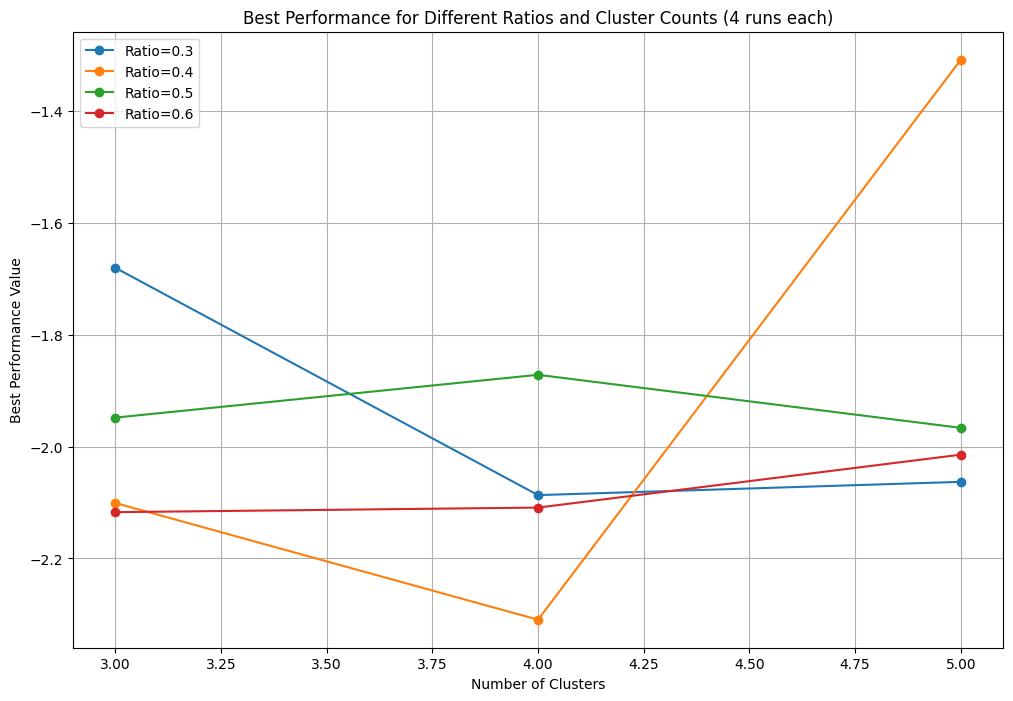

In [78]:
clustering_outcomes = []
import gc
import matplotlib.pyplot as plt

# Iterate over ratio_ga_compass and cluster_count values
for ratio in np.arange(0.3, 0.7, 0.1):  # Include 1.0 in the range
    for clusters in range(3, 6):  # cluster_count values from 1 to 5
        print(f'ratio_ga_compass = {ratio:.1f}, cluster_count = {clusters}')
        
        # Run improved_stochastic_clustering 4 times and keep the minimum
        best_value = float('inf')
        best_configuration = None
        for _ in range(4):
            configuration, performance = ISC(total_budget, ratio, clusters)
            if performance < best_value:
                best_value = performance
                best_configuration = configuration
        
        clustering_outcomes.append((ratio, clusters, best_value))
        print(f'Best performance after 4 runs: {best_value}, solution: {best_configuration}')
        # Define the variables you want to keep
        
# Convert clustering_outcomes to a numpy array for easier manipulation
outcome_array = np.array(clustering_outcomes)

# Create a plot for each ratio value
for ratio in np.unique(outcome_array[:, 0]):
    plt.figure(figsize=(10, 6))
    ratio_data = outcome_array[outcome_array[:, 0] == ratio]
    plt.plot(ratio_data[:, 1], ratio_data[:, 2], marker='o')
    
    plt.title(f'Best Performance for Ratio={ratio:.1f} (4 runs each)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Best Performance Value')
    plt.grid(True)
    #plt.savefig(f'performance_ratio_{ratio:.1f}.png')
    plt.close()

# Create a single plot with all ratio values
plt.figure(figsize=(12, 8))
for ratio in np.unique(outcome_array[:, 0]):
    ratio_data = outcome_array[outcome_array[:, 0] == ratio]
    plt.plot(ratio_data[:, 1], ratio_data[:, 2], marker='o', label=f'Ratio={ratio:.1f}')

plt.title('Best Performance for Different Ratios and Cluster Counts (4 runs each)')
plt.xlabel('Number of Clusters')
plt.ylabel('Best Performance Value')
plt.legend()
plt.grid(True)